In [ ]:
import pandas as pd

data = pd.read_csv(r"C:\Users\rhari\Downloads\data.csv.zip")
data.head()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [2]:
# descriptive statistics
descriptive_stats = data.describe()

# unique values in each categorical column
unique_values = {}
cat_columns = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder', 'Blood Pressure']
for col in cat_columns:
    unique_values[col] = data[col].unique()

display(descriptive_stats, unique_values)

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


{'Gender': array(['Male', 'Female'], dtype=object),
 'Occupation': array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
        'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
        'Salesperson', 'Manager'], dtype=object),
 'BMI Category': array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object),
 'Sleep Disorder': array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object),
 'Blood Pressure': array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
        '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
        '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
        '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
        '118/75'], dtype=object)}

In [3]:
# Correcting the inconsistency in 'BMI Category'
data['BMI Category'].replace({'Normal Weight': 'Normal'}, inplace=True)

# Splitting the 'Blood Pressure' column into 'Systolic' and 'Diastolic' columns
data['Systolic'] = data['Blood Pressure'].str.split('/').str[0].astype(int)
data['Diastolic'] = data['Blood Pressure'].str.split('/').str[1].astype(int)

data.drop(['Blood Pressure','Person ID'], axis=1, inplace=True)

C:\Users\rhari\AppData\Local\Temp\ipykernel_8252\1182926185.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['BMI Category'].replace({'Normal Weight': 'Normal'}, inplace=True)


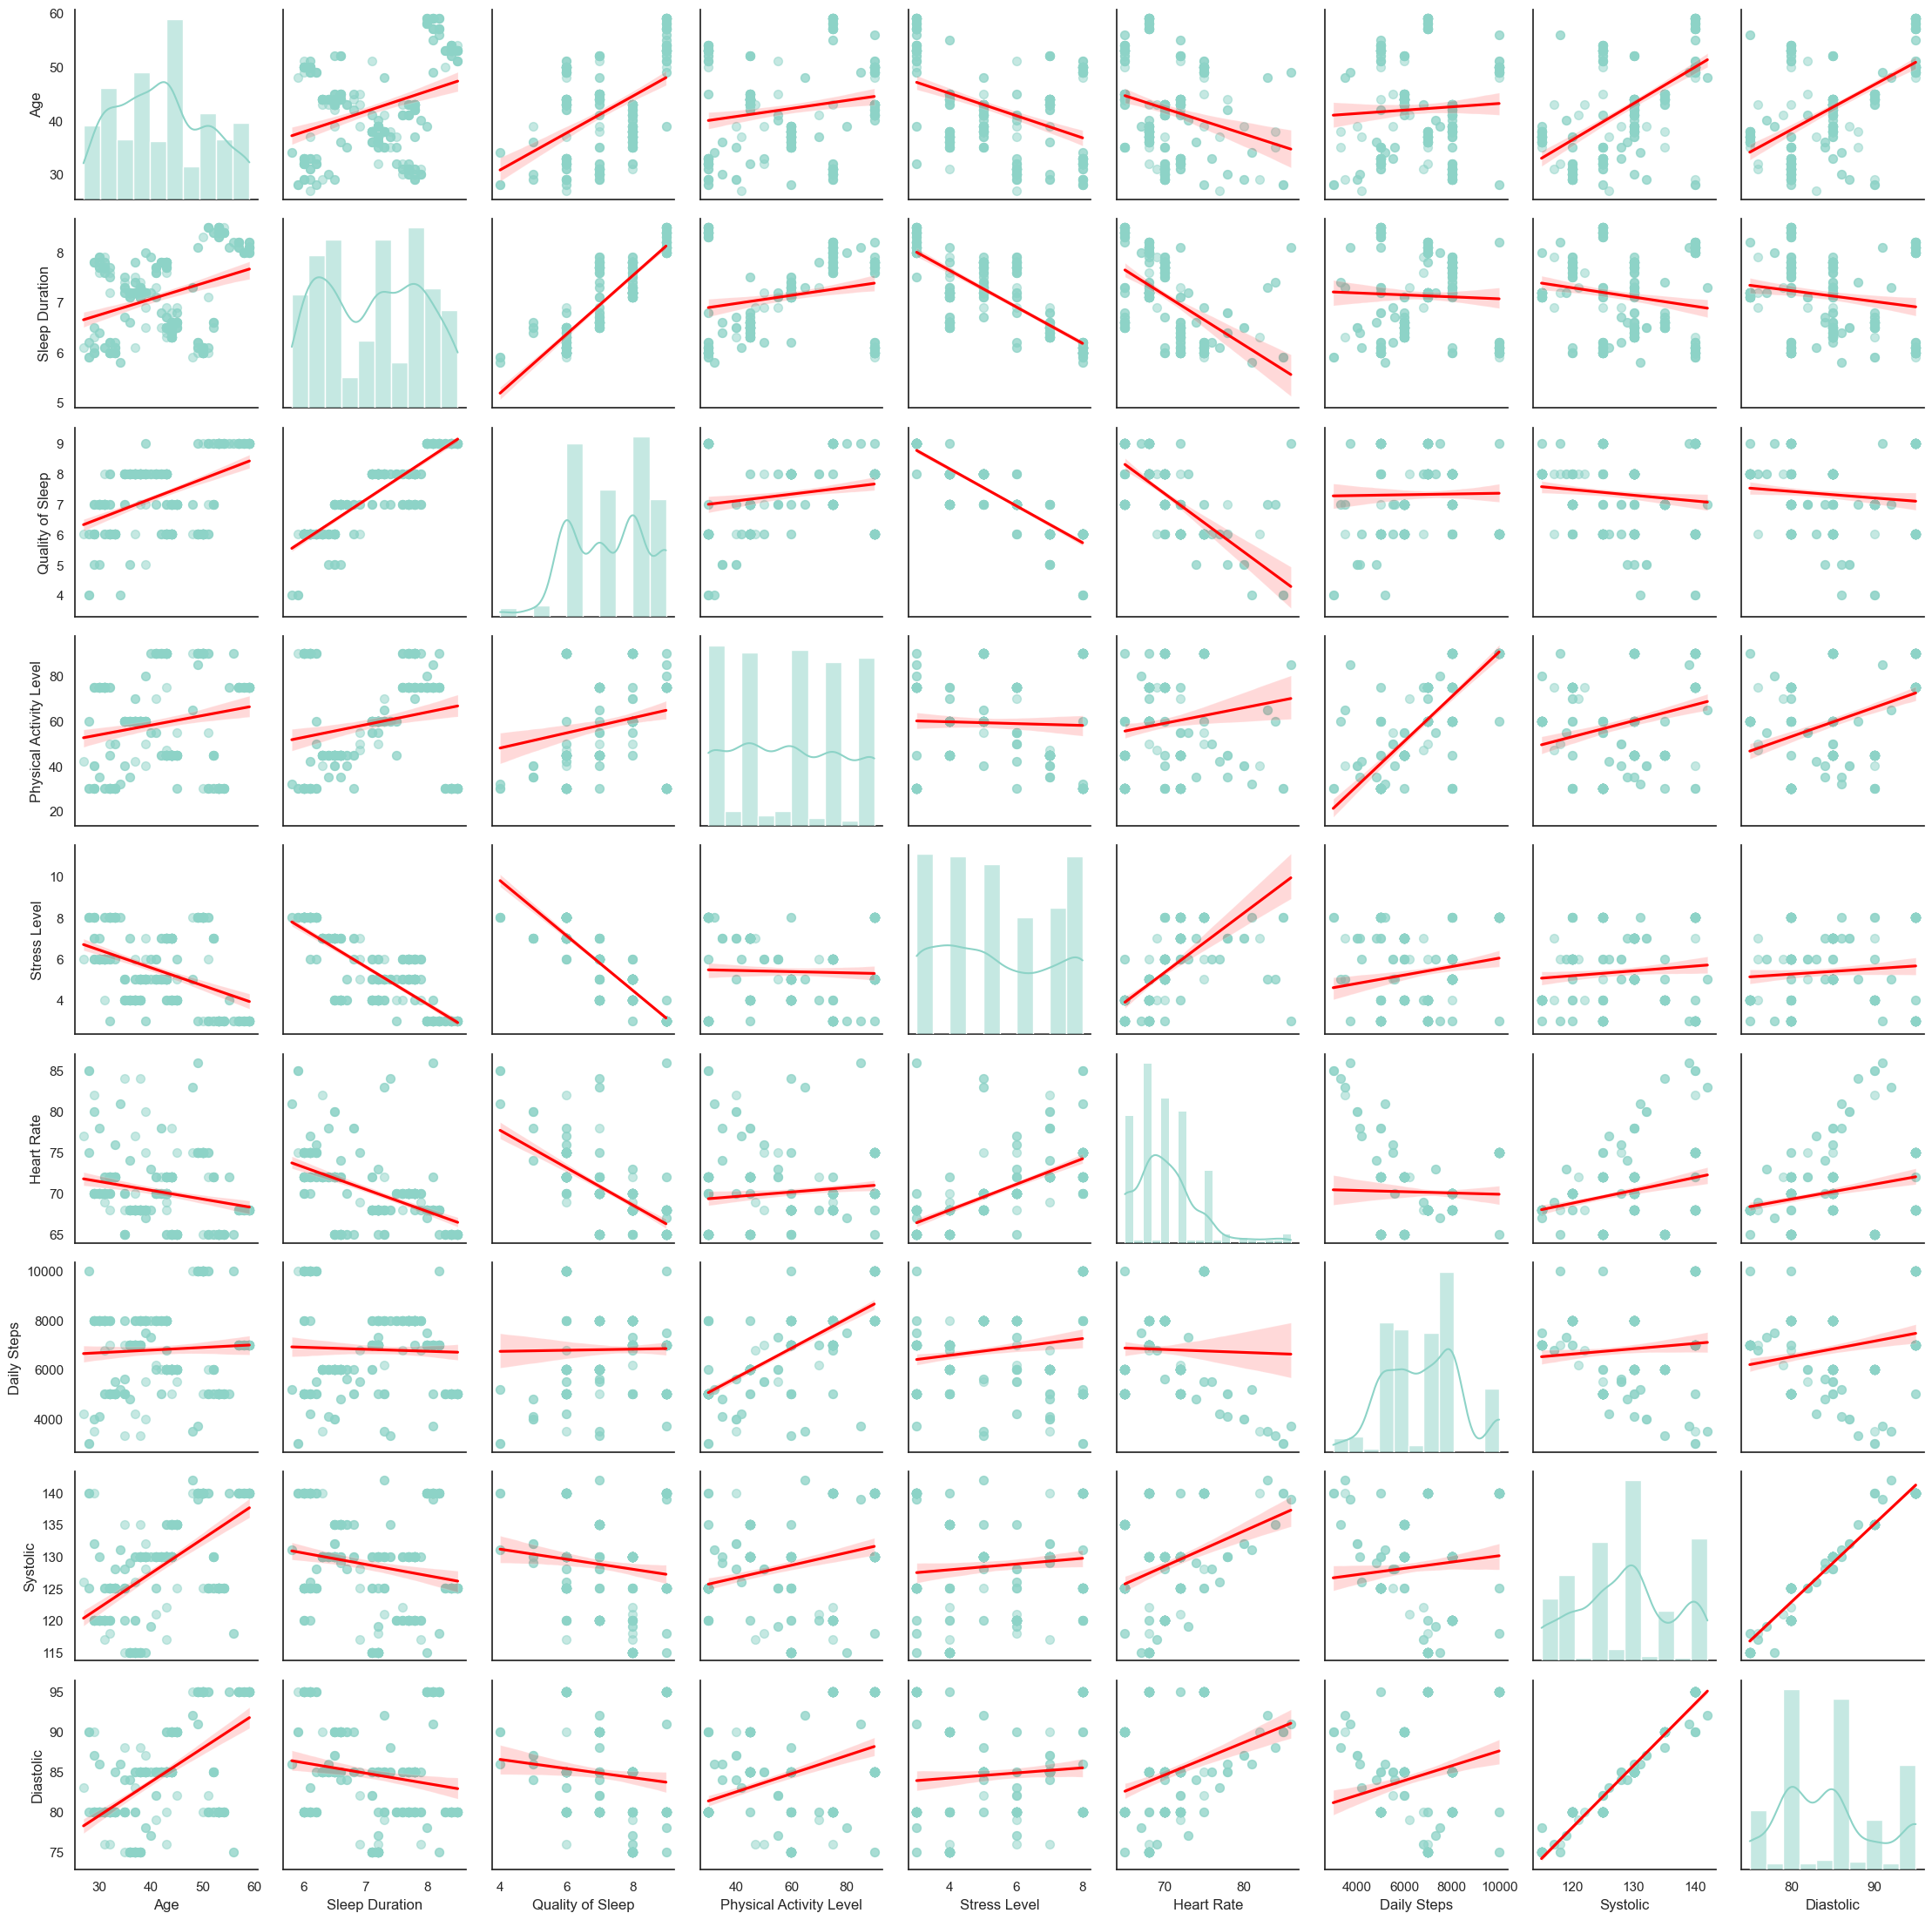

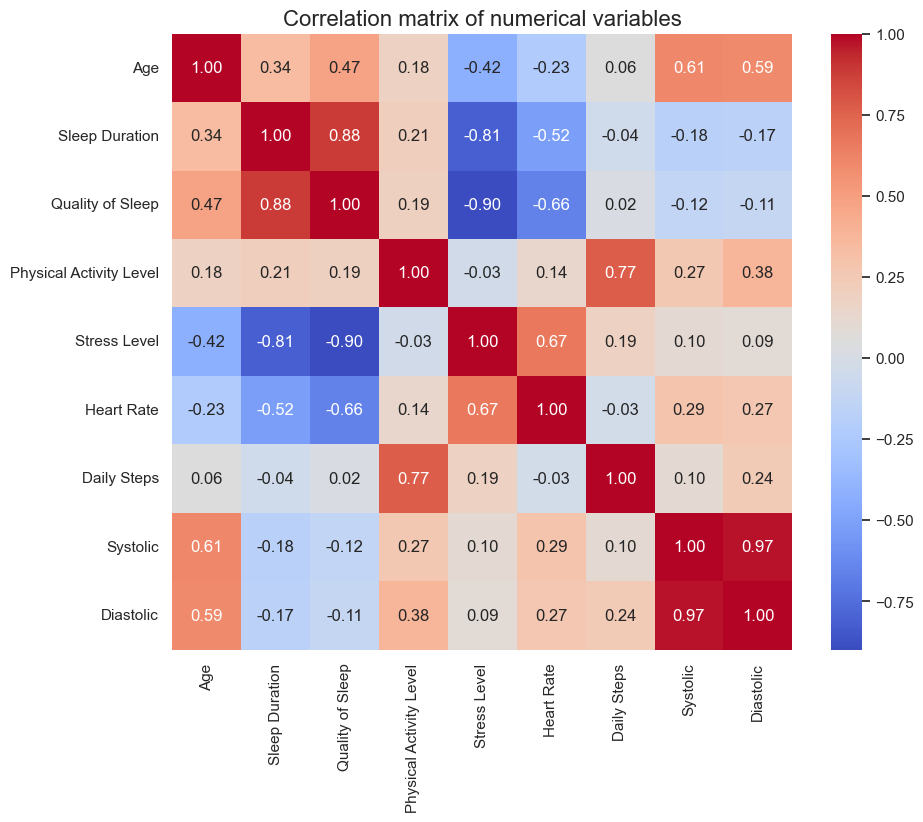

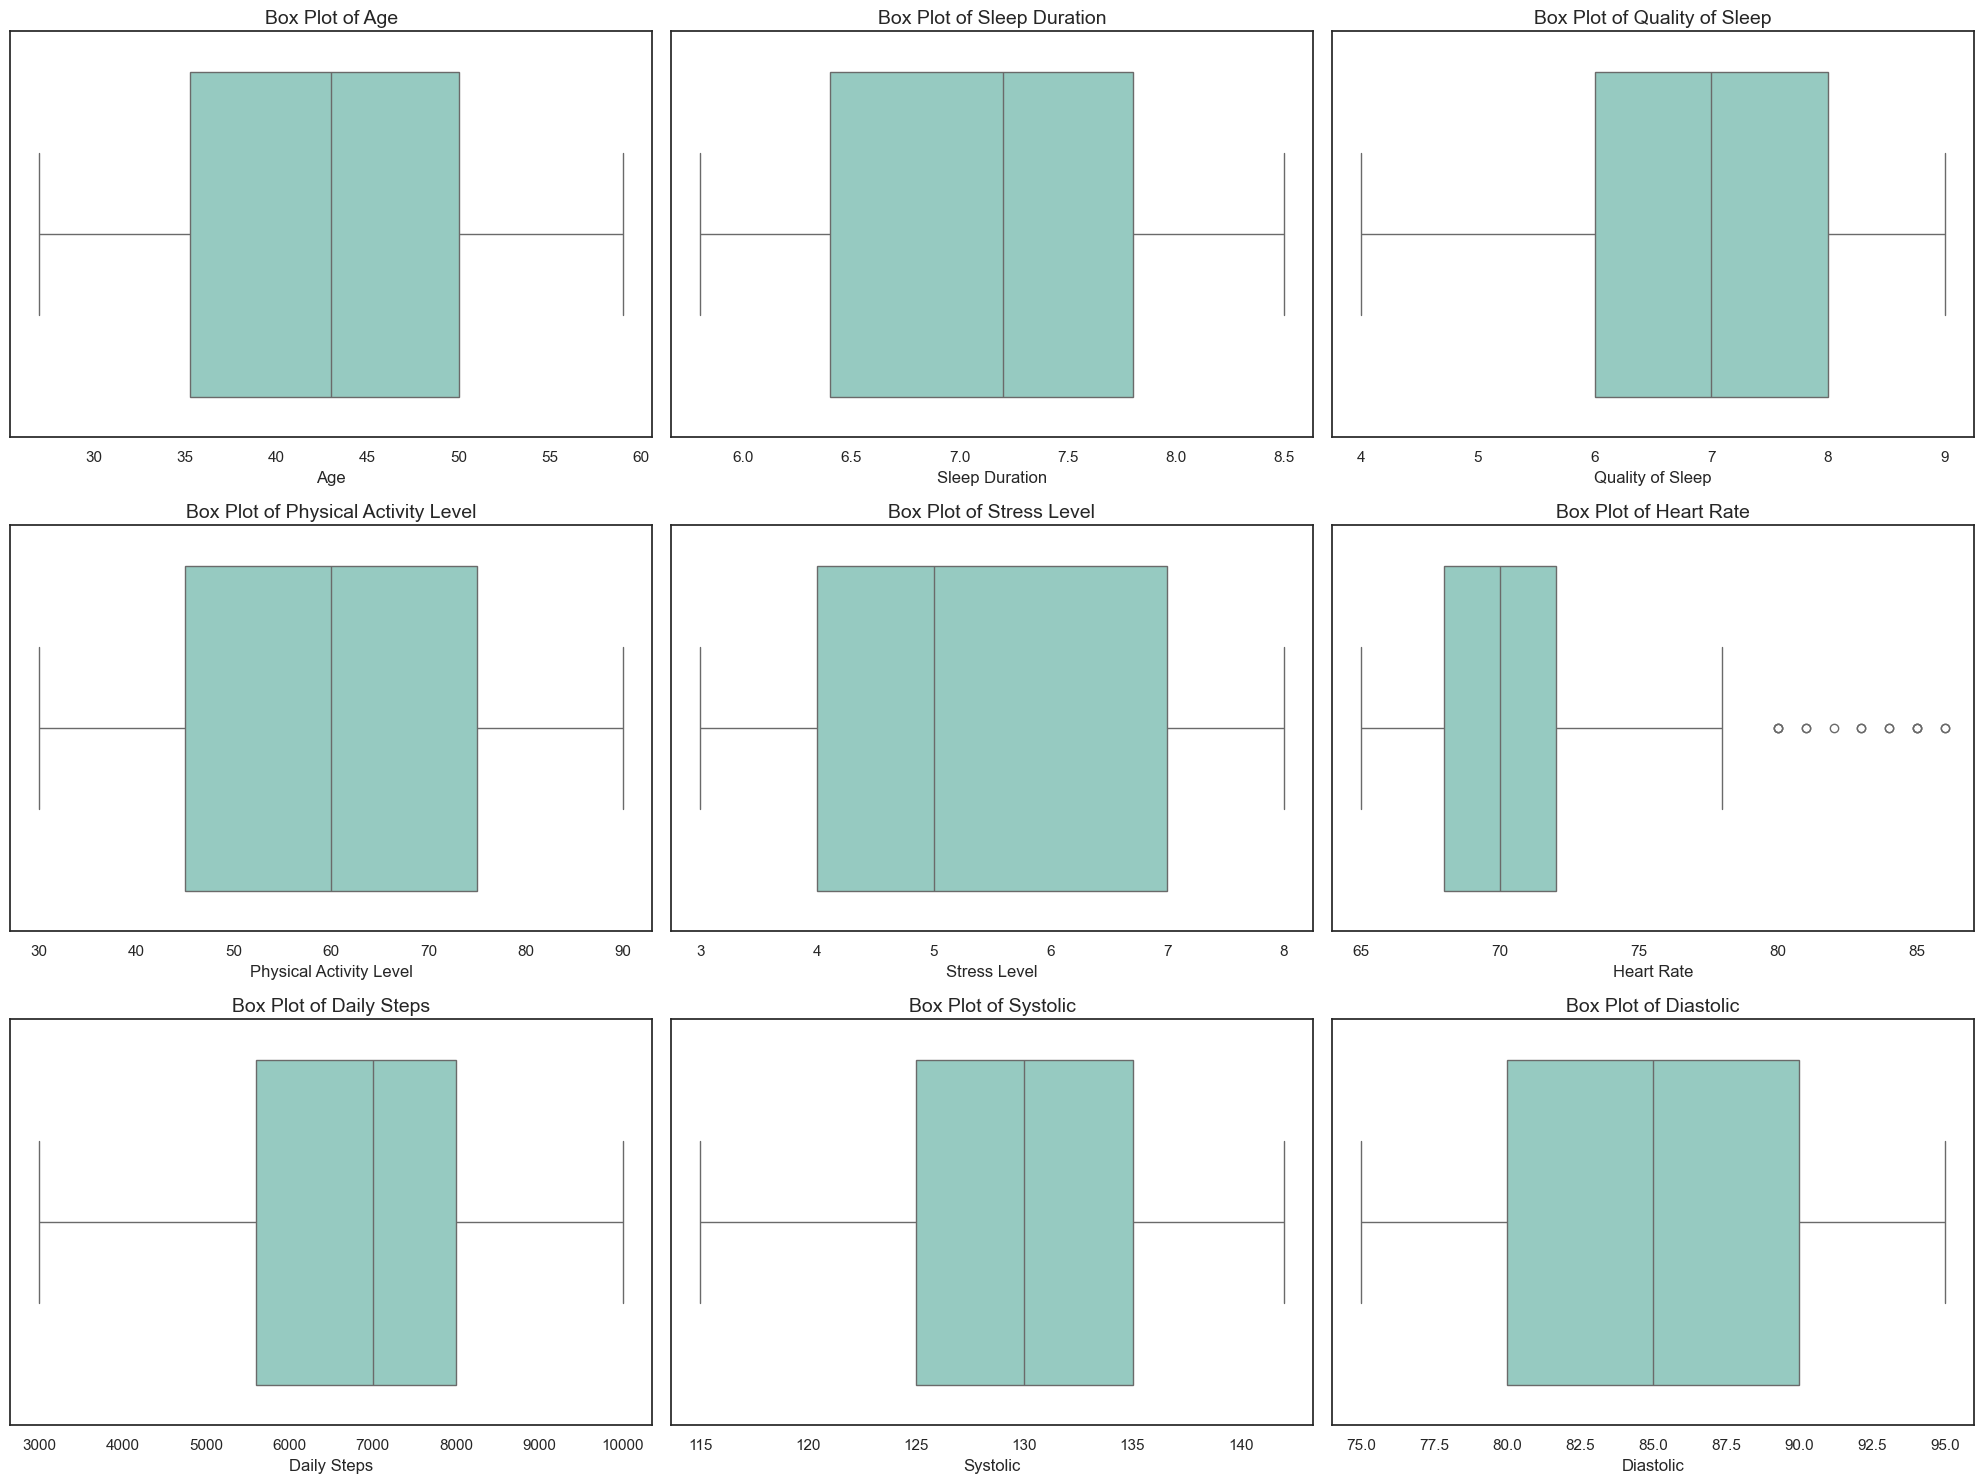

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white")
sns.set_palette(palette='Set3')

# List of key numerical variables
num_vars = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# PairGrid instance, mapping a histogram+KDE to the diagonal and regplot to the off-diagonal elements to show the bivariate distributions with a regression line
pair_grid = sns.PairGrid(data=data[num_vars], diag_sharey=False)

pair_grid.map_diag(sns.histplot, kde=True)

pair_grid.map_offdiag(sns.regplot, scatter_kws={'s':50, 'alpha':0.5}, line_kws={'color':'red'})

# Correlation matrix
corr_matrix = data[num_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation matrix of numerical variables', fontsize=16)
plt.show()

# Box plots to identify any outliers
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))

for i, var in enumerate(num_vars):
    row = i // 3
    col = i % 3
    sns.boxplot(x=data[var], ax=axes[row, col])
    axes[row, col].set_title(f'Box Plot of {var}', fontsize=14)
    axes[row, col].set_xlabel(var, fontsize=12)
    
plt.tight_layout()
plt.show()


C:\Users\rhari\AppData\Local\Temp\ipykernel_8252\1871529176.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[col].set_xticklabels(axes[col].get_xticklabels(), rotation=45)
C:\Users\rhari\AppData\Local\Temp\ipykernel_8252\1871529176.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[col].set_xticklabels(axes[col].get_xticklabels(), rotation=45)
C:\Users\rhari\AppData\Local\Temp\ipykernel_8252\1871529176.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[col].set_xticklabels(axes[col].get_xticklabels(), rotation=45)


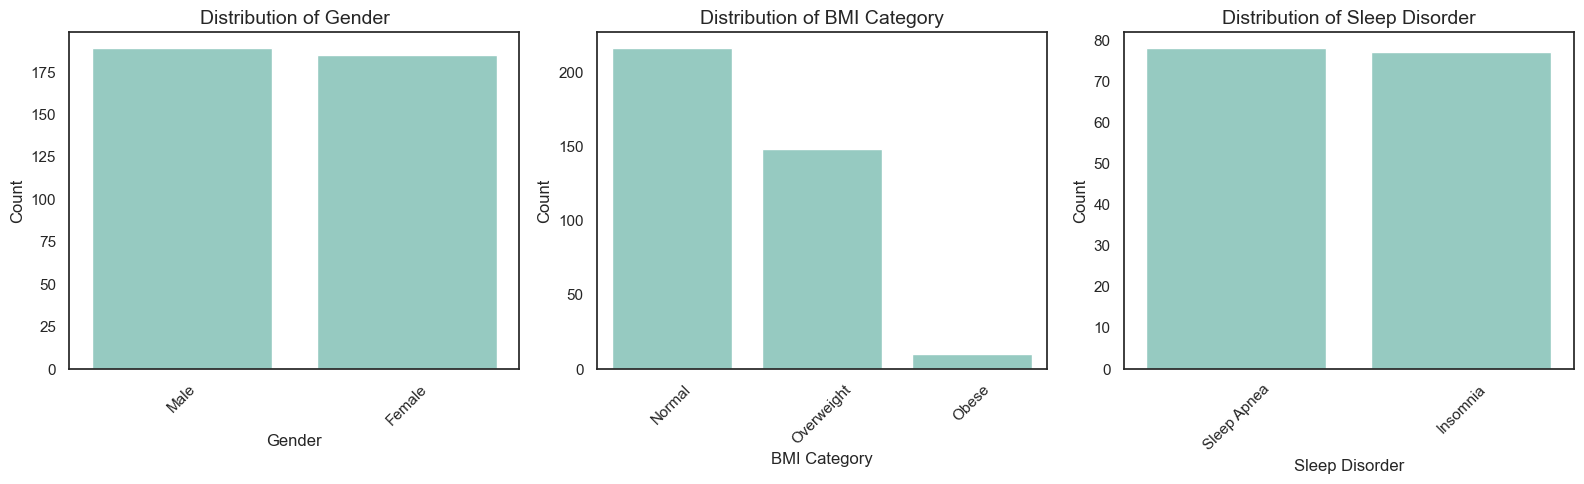

C:\Users\rhari\AppData\Local\Temp\ipykernel_8252\1871529176.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


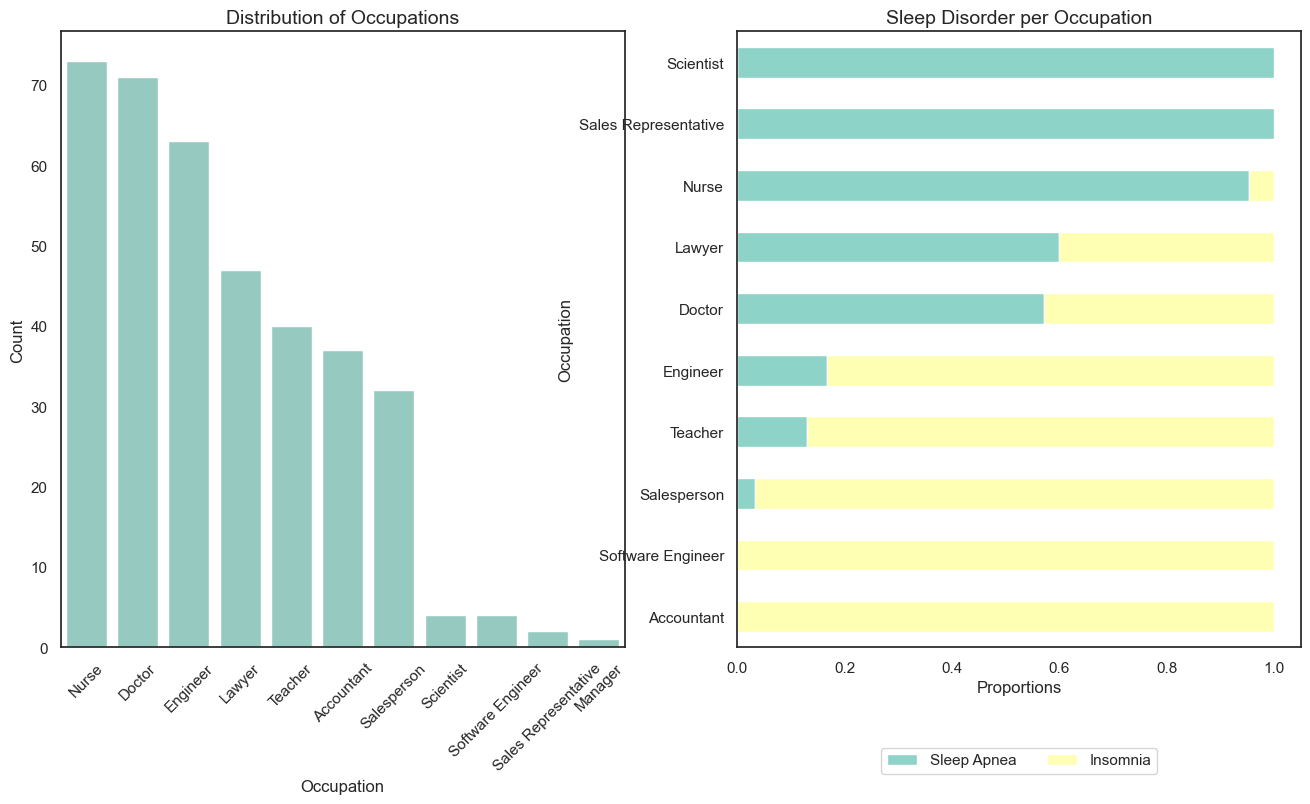

In [6]:
# Distribution of categorical variables
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

for i, var in enumerate(['Gender', 'BMI Category', 'Sleep Disorder']):
    col = i
    order = data[var].value_counts().index
    sns.countplot(x=var, data=data, ax=axes[col], order=order)    
    axes[col].set_title(f'Distribution of {var}', fontsize=14)
    axes[col].set_xlabel(var, fontsize=12)
    axes[col].set_ylabel('Count', fontsize=12)
    axes[col].set_xticklabels(axes[col].get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()


# Distribution of Sleep Disorder per Occupation variable 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

order = data['Occupation'].value_counts().index
sns.countplot(x='Occupation', data=data, ax=ax1, order=order)
ax1.set_title('Distribution of Occupations', fontsize=14)
ax1.set_xlabel('Occupation', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


# Group data and normalize
occup_dis = data.groupby('Occupation')['Sleep Disorder'].value_counts(normalize=True).unstack()

# Handle missing values
occup_dis = occup_dis.fillna(0)

# Sort by the first sleep disorder category (dynamically)
first_column = occup_dis.columns[0]
occup_dis = occup_dis.sort_values(by=first_column, ascending=False)

# Define the desired order of sleep disorder categories
order_sleep_disorder = ['None', 'Sleep Apnea', 'Insomnia']
order_sleep_disorder = [col for col in order_sleep_disorder if col in occup_dis.columns]  # Handle missing categories

# Plot stacked bar chart
occup_dis[order_sleep_disorder].plot(kind='barh', stacked=True, ax=ax2)
ax2.set_title('Sleep Disorder per Occupation', fontsize=14)
ax2.set_xlabel('Proportions', fontsize=12)
ax2.set_ylabel('Occupation', fontsize=12)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)


In [7]:
#installing required libraries
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

X = data.drop(['Sleep Disorder'], axis=1) 
y = data['Sleep Disorder']

# Label encoding for categorical variables in X
label_encoders = {}  # To store the encoder objects for potential inverse transformations later

for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Encoding the target variable
le_target = LabelEncoder()
y = le_target.fit_transform(y)

X.head(), y[:5]

(   Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
 0       1   27           9             6.1                 6   
 1       1   28           1             6.2                 6   
 2       1   28           1             6.2                 6   
 3       1   28           6             5.9                 4   
 4       1   28           6             5.9                 4   
 
    Physical Activity Level  Stress Level  BMI Category  Heart Rate  \
 0                       42             6             2          77   
 1                       60             8             0          75   
 2                       60             8             0          75   
 3                       30             8             1          85   
 4                       30             8             1          85   
 
    Daily Steps  Systolic  Diastolic  
 0         4200       126         83  
 1        10000       125         80  
 2        10000       125         80  
 3         3000       14

In [8]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

#Applying StandardScaler to Numerical Variables
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test_scaled[num_vars] = scaler.transform(X_test[num_vars])

In [9]:
#Creating function to train and validate models
def train_and_cross_validate(model, X_train, y_train, cv=5):
    """
    Function to train the models using cross-validation and return the average score.
    """
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1_weighted')
    print(f"{model.__class__.__name__} Cross-Validation F1_weighted: {np.mean(scores):.2f} +/- {np.std(scores):.2f}")
    model.fit(X_train, y_train)  
    return model


LogisticRegression Cross-Validation F1_weighted: 0.88 +/- 0.05
LogisticRegression Classification Report:
              precision    recall  f1-score   support

        None       0.73      0.83      0.78        23
 Sleep Apnea       0.69      0.83      0.75        24
    Insomnia       0.98      0.86      0.92        66

    accuracy                           0.85       113
   macro avg       0.80      0.84      0.82       113
weighted avg       0.87      0.85      0.86       113



RidgeClassifier Cross-Validation F1_weighted: 0.87 +/- 0.05
RidgeClassifier Classification Report:
              precision    recall  f1-score   support

        None       0.70      0.83      0.76        23
 Sleep Apnea       0.77      0.83      0.80        24
    Insomnia       0.98      0.89      0.94        66

    accuracy                           0.87       113
   macro avg       0.82      0.85      0.83       113
weighted avg       0.88      0.87      0.87       113



SVC Cross-Validation F1_weight

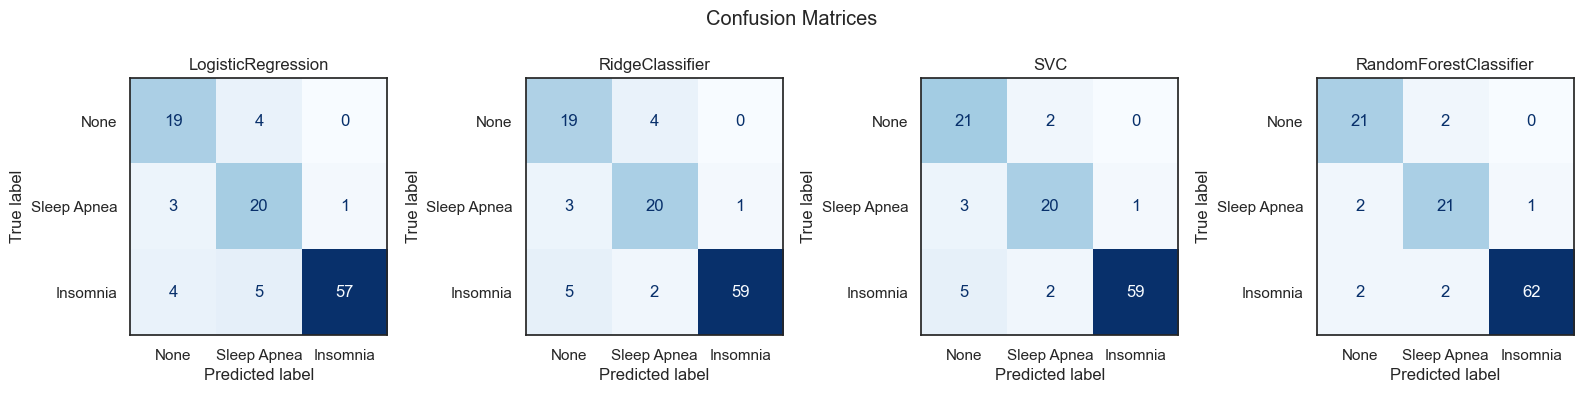

In [10]:
#Creating function to evaluate and plot models   
def evaluate_and_plot_confusion_matrix(model, X_train, y_train, X_test, y_test, class_names, ax):
    """
    Evaluate the model and plot the confusion matrix.
    """
    y_pred = model.predict(X_test)
    print(f"{model.__class__.__name__} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=class_names))
    print("\n" + "="*80 + "\n")
    
    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues, ax=ax)
    disp.im_.colorbar.remove()
    ax.set_title(f"{model.__class__.__name__}")
    fig.suptitle('Confusion Matrices')

# Defining class names for confusion matrix display
class_names = ['None', 'Sleep Apnea', 'Insomnia']

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

# Flatten the array of axes for easy iteration
axes = axes.flatten()

models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, class_weight='balanced'),
    "Ridge Classifier": RidgeClassifier(class_weight='balanced'),
    "SVM": SVC(class_weight='balanced', kernel='linear'),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42)
}

# Iterate over models, cross-validate, train, predict, and generate classification report and confusion matrix
for i, (name, model) in enumerate(models.items()):
    X_train_set, X_test_set = (X_train_scaled, X_test_scaled) if name in ["Logistic Regression", "Ridge Classifier", "SVM"] else (X_train, X_test)
    
    trained_model = train_and_cross_validate(model, X_train_set, y_train)
    evaluate_and_plot_confusion_matrix(trained_model, X_test_set, y_test, X_test_set, y_test, class_names, axes[i])

plt.tight_layout()
plt.show()

Fitting 5 folds for each of 12 candidates, totalling 60 fits
LogisticRegression Classification Report:
              precision    recall  f1-score   support

        None       0.77      0.87      0.82        23
 Sleep Apnea       0.75      0.88      0.81        24
    Insomnia       0.98      0.88      0.93        66

    accuracy                           0.88       113
   macro avg       0.83      0.87      0.85       113
weighted avg       0.89      0.88      0.88       113



Best Parameters for Logistic Regression: {'C': 10, 'solver': 'lbfgs'}


Fitting 5 folds for each of 3 candidates, totalling 15 fits
RidgeClassifier Classification Report:
              precision    recall  f1-score   support

        None       0.70      0.83      0.76        23
 Sleep Apnea       0.77      0.83      0.80        24
    Insomnia       0.98      0.89      0.94        66

    accuracy                           0.87       113
   macro avg       0.82      0.85      0.83       113
weighted avg     

C:\Users\rhari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
526 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rhari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rhari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local

RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

        None       0.79      0.83      0.81        23
 Sleep Apnea       0.77      0.83      0.80        24
    Insomnia       0.98      0.94      0.96        66

    accuracy                           0.89       113
   macro avg       0.85      0.87      0.86       113
weighted avg       0.90      0.89      0.90       113



Best Parameters for Random Forest: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}




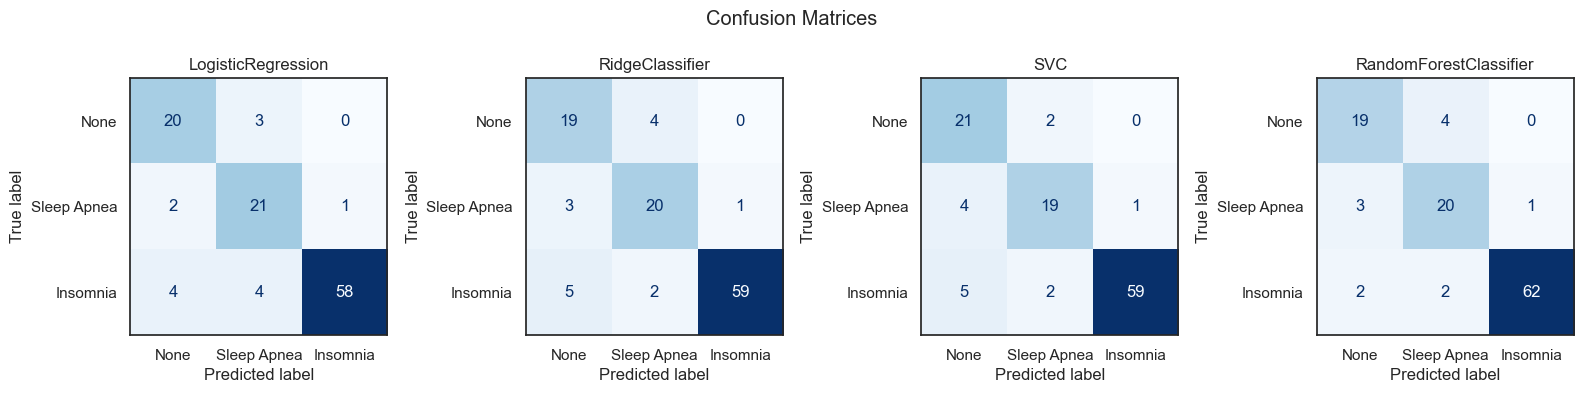

In [11]:
#Creating a function to perform grid search on models
def perform_grid_search(model, params, X_train, y_train):
    """
    Perform grid search for hyperparameter tuning.
    """
    grid_search = GridSearchCV(model, params, cv=5, scoring='f1_weighted', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_

# Model parameters and configurations

param_grids = {
    "Logistic Regression": {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs', 'saga']},
    "Ridge Classifier": {'alpha': [0.1, 1.0, 10.0]},
    "SVM": {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': ['scale', 'auto']},
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }
}


fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))
axes = axes.flatten()

# Model training, hyperparameter tuning, evaluation, and plotting
for i, (name, model) in enumerate(models.items()):

    X_train_set, X_test_set = (X_train_scaled, X_test_scaled) if name in ["Logistic Regression", "Ridge Classifier", "SVM"] else (X_train, X_test)
    best_model, best_params = perform_grid_search(model, param_grids[name], X_train_set, y_train)
    evaluate_and_plot_confusion_matrix(best_model, X_test_set, y_test, X_test_set, y_test, class_names, axes[i])
    print(f"Best Parameters for {name}: {best_params}")
    print("\n" + "="*80 + "\n")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Feature Importance')

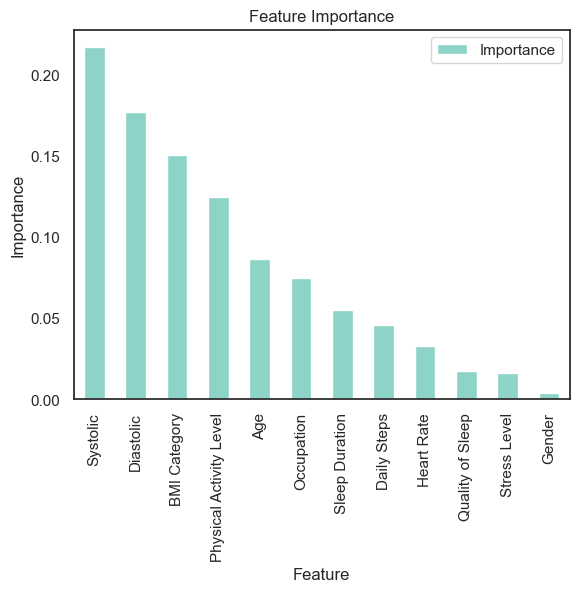

In [ ]:
#Training RandomForestClassifier to extract feature importance
rf = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    bootstrap=True,
    max_depth=None,
    max_features='sqrt',  
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=50
).fit(X_train, y_train)


feature_importances = rf.feature_importances_

features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

features_df.sort_values(by='Importance', ascending=False).plot(x='Feature',y='Importance',kind='bar')
plt.ylabel('Importance')
plt.title('Feature Importance')